In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# task 1

In [2]:
#1
mean=mean=70
std=std=11.35


In [3]:
x1=55
z1=(x1-mean)/std


In [4]:
prob_value=st.norm.cdf(z1)
prob_value

0.09315304005028419

In [5]:
x2=80
z2=(x2-mean)/std


In [6]:
prob_value=st.norm.cdf(z2)
prob_value

0.8108565879950915

In [7]:
probability_values=st.norm.cdf(z2)-st.norm.cdf(z1)
probability_values
print('The probabilty betwwen USD55 {} AND USD80 {}' .format(z1,z2))

The probabilty betwwen USD55 -1.3215859030837005 AND USD80 0.881057268722467


In [8]:
st.norm.cdf(z2)-st.norm.cdf(z1)


0.7177035479448073

In [10]:
#2
mean=mean=70
std=std=11.35


In [11]:
x=40
z=(x-mean)/std
prob_value=1-st.norm.cdf(z)
print('The probability bill amount to no more than USD40 {}' .format(z))

The probability bill amount to no more than USD40 -2.643171806167401


# task 2

In [13]:
#a
data=pd.read_csv('DS1_C5_S5_SmartCarRiding_Data_Practice.csv')
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [36]:
data.shape

(200000, 9)

In [38]:
(data.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [11]:
#b
a=data['fare_amount']
Q1=a.quantile(0.25)
Q3=a.quantile(0.75)
IQR=Q3-Q1
LF=Q1-1.5*IQR
UF=Q3+1.5*IQR
print('Q1 {}, Q2 {}, IQR {}, LF {}, UF {}' .format(Q1,Q3,IQR,LF,UF))

Q1 6.0, Q2 12.5, IQR 6.5, LF -3.75, UF 22.25


In [12]:
outliers=[]
for i in a:
    if i<LF:
        outliers.append(i)
    if i>UF:
        outliers.append(i)
len(outliers)

17167

In [23]:
#replace
data['fare_amount'].replace(to_replace=outliers,value=data['fare_amount'].mean(),inplace=True)

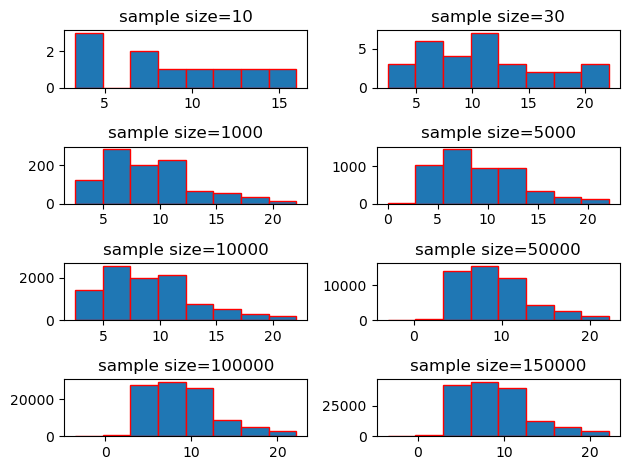

In [24]:
#c
j=1
list=[10,30,1000,5000,10000,50000,100000,150000]
for i in list:
    plt.subplot(4,2,j)
    dataa=data['fare_amount'].sample(i)
    plt.hist(dataa,bins=8,edgecolor='r')
    plt.tight_layout()
    plt.title('sample size='+str(i))
    j=j+1
    

In [17]:
#d
sam_30=data[data['fare_amount']>=200].sample(30,replace=True)
sam_30

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
71715,38680012,2013-05-11 00:31:00.00000084,250.00,2013-05-11 00:31:00 UTC,0.000000,0.000000,0.000000,0.000000,1
29261,5471406,2013-09-27 12:36:11.0000002,220.00,2013-09-27 12:36:11 UTC,-73.801147,40.671653,-73.790402,40.646742,1
29261,5471406,2013-09-27 12:36:11.0000002,220.00,2013-09-27 12:36:11 UTC,-73.801147,40.671653,-73.790402,40.646742,1
185325,20013003,2013-04-19 00:00:00.000000235,275.00,2013-04-19 00:00:00 UTC,0.000000,0.000000,0.000000,0.000000,1
29261,5471406,2013-09-27 12:36:11.0000002,220.00,2013-09-27 12:36:11 UTC,-73.801147,40.671653,-73.790402,40.646742,1
196647,13085828,2010-08-19 16:52:45.0000003,200.00,2010-08-19 16:52:45 UTC,-73.952994,40.736298,-73.952994,40.736298,1
170081,51151143,2011-04-10 04:10:00.00000064,499.00,2011-04-10 04:10:00 UTC,-73.968377,40.764602,-73.968368,40.764600,1
4292,33491441,2014-10-24 20:20:00.000000181,350.00,2014-10-24 20:20:00 UTC,0.000000,0.000000,0.000000,0.000000,3
197493,54143082,2014-09-07 08:39:00.00000012,230.00,2014-09-07 08:39:00 UTC,-73.937765,40.758267,-74.382200,40.700890,2
196647,13085828,2010-08-19 16:52:45.0000003,200.00,2010-08-19 16:52:45 UTC,-73.952994,40.736298,-73.952994,40.736298,1


In [15]:
#e
print('pop_mean:', data['fare_amount'].mean())
print('pop_median:', data['fare_amount'].median())
print('pop_std:', data['fare_amount'].std())
print('pop_var:', np.sqrt(std))
print('pop_skew:', st.skew(data['fare_amount']))
print('pop_kurtosis:', st.kurtosis(data['fare_amount'],fisher=True))

pop_mean: 11.359955250000626
pop_median: 8.5
pop_std: 9.901776225068813
pop_var: 3.3689761055846033
pop_skew: 4.504813074180271
pop_kurtosis: 63.88268703411687


In [18]:
print('sample_mean:', sam_30['fare_amount'].mean())
print('sample_median:', sam_30['fare_amount'].median())
print('sample_std:', sam_30['fare_amount'].std())
print('sample_var:', np.sqrt(std))
print('sample_skew:', st.skew(sam_30['fare_amount']))
print('sample_kurtosis:', st.kurtosis(sam_30['fare_amount'],fisher=True))

sample_mean: 299.72533333333337
sample_median: 240.0
sample_std: 110.85998400384754
sample_var: 3.3689761055846033
sample_skew: 1.0086492460812548
sample_kurtosis: -0.5845889352718916


# central limit theorem

In [14]:
b=[]
for i in range(30):
    b.append(data['fare_amount'].sample(n=30).mean())
b


[12.784333333333334,
 8.31,
 9.551333333333336,
 8.98,
 10.811000000000002,
 14.923333333333334,
 9.6,
 15.495666666666665,
 10.943333333333335,
 14.342000000000004,
 9.110000000000001,
 11.213333333333333,
 13.617666666666667,
 10.737666666666668,
 14.043666666666667,
 9.68,
 11.44,
 13.758666666666667,
 9.133333333333333,
 11.356666666666666,
 10.620999999999999,
 9.456666666666669,
 11.230999999999998,
 9.886666666666665,
 11.713333333333333,
 12.426666666666666,
 8.419999999999998,
 11.944333333333333,
 14.816333333333334,
 9.98666666666667]

# population_mean

In [15]:
pop_mean=data['fare_amount'].mean()
pop_mean

11.359955250000626

# sample_mean

In [124]:
sample_mean=np.mean(b)
sample_mean

12.408422222222221

In [125]:
print('pop_mean {} and sample_mean {}' .format(pop_mean,sample_mean))

pop_mean 11.359955250000626 and sample_mean 12.408422222222221


# population_std

In [130]:
pop_std=np.std(data['fare_amount'])/np.sqrt(30)
pop_std

1.8078042130853658

# sample_std

In [133]:
sample_std=np.std(b)
sample_std

1.964624529075953

In [135]:
print('pop_std {} and sample_std {}' .format(pop_std,sample_std))

pop_std 1.8078042130853658 and sample_std 1.964624529075953


In [104]:
#e
data['fare_amount']

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 200000, dtype: float64

In [105]:
mean=data['fare_amount'].mean()
std=data['fare_amount'].std()
lower=mean-3*std
upper=mean+3*std
data=np.arange(lower,upper,1)
x=st.norm.pdf(data,loc=mean,scale=std)


In [106]:
x

array([0.00044758, 0.00060289, 0.00080385, 0.00106092, 0.00138599,
       0.00179228, 0.00229417, 0.00290679, 0.00364563, 0.00452588,
       0.00556164, 0.00676509, 0.00814544, 0.00970792, 0.01145271,
       0.01337399, 0.01545909, 0.01768794, 0.02003278, 0.02245824,
       0.02492186, 0.02737511, 0.02976471, 0.03203449, 0.03412751,
       0.03598833, 0.03756552, 0.03881392, 0.03969685, 0.04018788,
       0.04027213, 0.03994704, 0.03922248, 0.03812027, 0.03667308,
       0.03492281, 0.03291861, 0.03071456, 0.02836727, 0.0259335 ,
       0.02346796, 0.02102132, 0.01863868, 0.01635839, 0.01421139,
       0.0122209 , 0.01040256, 0.00876491, 0.00731014, 0.00603495,
       0.00493165, 0.00398916, 0.00319405, 0.00253146, 0.00198597,
       0.00154221, 0.00118546, 0.00090198, 0.00067933, 0.00050645])

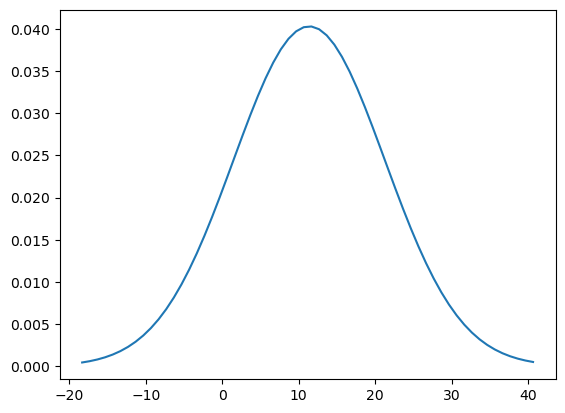

In [107]:
plt.plot(data,x)

In [108]:
st.norm.cdf(mean+std,loc=mean,scale=std)-st.norm.cdf(mean-std,loc=mean,scale=std)

0.6826894921370859

In [109]:
st.norm.cdf(mean+2*std,loc=mean,scale=std)-st.norm.cdf(mean-2*std,loc=mean,scale=std)

0.9544997361036416

In [110]:
st.norm.cdf(mean+3*std,loc=mean,scale=std)-st.norm.cdf(mean-3*std,loc=mean,scale=std)

0.9973002039367398